In [8]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
import collections

import numpy as np
import matplotlib.pyplot as plt

from util import Params, prepare_sns
from data import load_diseases, load_network, build_disease_matrix


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Protein Disease Associations
Statistics for the methods section on protein-disease associations

In [2]:
ppi_networkx, ppi_network_adj, protein_to_idx = load_network("../../data/networks/bio-pathways-network.txt")
idx_to_protein = {val: key for key, val in protein_to_idx.items()}

In [3]:
diseases_dict = load_diseases("../../data/associations/disgenet-associations-nodup7-cv-cc7.csv")

In [4]:
disease_matrix, idx_to_disease = build_disease_matrix(diseases_dict, protein_to_idx, exclude_splits=['none'])

## Number of Associations
Stats on the number of associations

In [25]:
total = np.sum(disease_matrix)
print("# of associations, total: {}".format(total))

# of associations, total: 75744


In [26]:
counts = np.sum(disease_matrix, axis=1)

In [27]:
median = np.median(associations)
mean = np.mean(associations)
std = np.std(associations)
print("# of associations, mean: {}".format(mean))
print("# of associations, median: {}".format(median))
print("# of associations, std: {}".format(std))

# of associations, mean: 41.8244064053
# of associations, median: 21.0
# of associations, std: 69.2707942663


In [34]:
num_to_print = 10
for disease, count in map(lambda x: (idx_to_disease[x], counts[x]), np.argsort(counts)[num_to_print:]):
    print("{}: {} associated proteins".format(disease.name, count))

Uveal melanoma: 8 associated proteins
Hypoventilation: 8 associated proteins
Osteitis Deformans: 8 associated proteins
Flat acetabular roof: 9 associated proteins
Pancreatitis, Chronic: 9 associated proteins
Loss of retinal pigment epithelium: 9 associated proteins
Carcinogenesis: 9 associated proteins
Pathological accumulation of air in tissues: 9 associated proteins
Leprosy: 9 associated proteins
Abnormality of mitochondrial metabolism: 9 associated proteins
Irido-corneo-trabecular dysgenesis (disorder): 9 associated proteins
Stretched skin: 9 associated proteins
Abnormal lung lobation: 9 associated proteins
Decreased activity of cytochrome C oxidase in muscle tissue: 9 associated proteins
Tongue Neoplasms: 9 associated proteins
Delayed epiphyseal ossification: 9 associated proteins
Aplasia/Hypoplasia of the iris: 9 associated proteins
MYCOBACTERIUM TUBERCULOSIS, SUSCEPTIBILITY TO (finding): 9 associated proteins
Berylliosis: 9 associated proteins
Hamartoma Syndrome, Multiple: 9 asso

# PPI Network
Statistics on the protein-protein interaction network

## Degree Sequence

Counter({1: 4183, 2: 1579, 3: 1041, 4: 854, 5: 685, 6: 603, 7: 573, 8: 493, 9: 468, 10: 458, 11: 431, 12: 360, 13: 356, 14: 331, 15: 305, 17: 296, 16: 284, 19: 261, 20: 246, 18: 230, 22: 228, 21: 221, 25: 193, 24: 188, 28: 188, 23: 187, 26: 172, 27: 167, 29: 164, 30: 156, 32: 141, 31: 127, 33: 127, 35: 127, 34: 122, 37: 118, 41: 114, 36: 113, 38: 109, 39: 107, 43: 96, 42: 95, 40: 94, 44: 90, 48: 87, 45: 84, 54: 84, 46: 83, 51: 77, 47: 75, 49: 74, 58: 73, 50: 71, 53: 67, 62: 63, 55: 62, 52: 61, 61: 59, 63: 58, 66: 58, 57: 56, 59: 56, 60: 56, 56: 55, 79: 48, 67: 47, 69: 41, 64: 40, 68: 40, 70: 39, 72: 39, 75: 39, 74: 38, 83: 38, 87: 38, 65: 37, 80: 36, 82: 35, 73: 34, 88: 34, 84: 33, 86: 32, 89: 32, 90: 31, 81: 30, 94: 28, 99: 28, 100: 28, 78: 27, 96: 27, 76: 26, 71: 25, 77: 25, 93: 25, 103: 25, 101: 24, 102: 24, 97: 23, 98: 23, 110: 23, 85: 22, 92: 22, 95: 22, 106: 21, 91: 20, 104: 20, 121: 20, 107: 19, 109: 18, 123: 18, 132: 18, 111: 17, 115: 17, 119: 17, 105: 16, 114: 16, 117: 16, 134

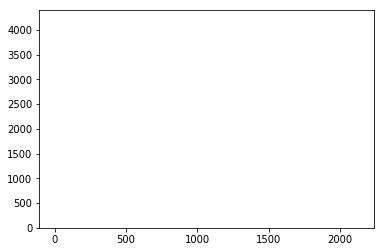

In [15]:
degree_sequence = sorted([d for n, d in ppi_networkx.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
print(degreeCount)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, color='b')
plt.show()

In [10]:
ppi_networkx.degree()

DegreeView({0: 12, 1: 105, 2: 11, 3: 1, 4: 1, 5: 6, 6: 24, 7: 33, 8: 1, 9: 31, 10: 11, 11: 55, 12: 1, 13: 46, 14: 54, 15: 21, 16: 10, 17: 25, 18: 65, 19: 1, 20: 389, 21: 54, 22: 52, 23: 3, 24: 17, 25: 54, 26: 84, 27: 13, 28: 12, 29: 88, 30: 38, 31: 47, 32: 32, 33: 80, 34: 67, 35: 6, 36: 11, 37: 14, 38: 18, 39: 14, 40: 15, 41: 74, 42: 23, 43: 4, 44: 36, 45: 51, 46: 48, 47: 43, 48: 15, 49: 9, 50: 1, 51: 200, 52: 95, 53: 466, 54: 1, 55: 11, 56: 1, 57: 12, 58: 1, 59: 65, 60: 187, 61: 123, 62: 5, 63: 2, 64: 1, 65: 153, 66: 155, 67: 164, 68: 105, 69: 59, 70: 121, 71: 51, 72: 33, 73: 35, 74: 22, 75: 31, 76: 3, 77: 13, 78: 1, 79: 32, 80: 1, 81: 27, 82: 75, 83: 38, 84: 10, 85: 26, 86: 27, 87: 33, 88: 42, 89: 33, 90: 28, 91: 28, 92: 33, 93: 27, 94: 5, 95: 79, 96: 24, 97: 35, 98: 1, 99: 1, 100: 14, 101: 26, 102: 31, 103: 30, 104: 25, 105: 42, 106: 30, 107: 26, 108: 10, 109: 10, 110: 11, 111: 16, 112: 7, 113: 5, 114: 3, 115: 12, 116: 4, 117: 286, 118: 9, 119: 55, 120: 1, 121: 16, 122: 14, 123: 9, 